TB Praktikum Kecerdasan Buatan

Ade Kurnia (2106029)

Zhillan M Faza (2106115)

In [ ]:
#Impor library yang diperlukan:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [ ]:
#Impor dataset:
dataset = pd.read_csv('indonesia_population.csv')
dataset

,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,Indonesia Global Rank
0,2020,273523615,1.07,2898047,-98955,29.7,2.32,151,56.4,154188546,3.51,7794798739,4
1,2019,270625568,1.10,2955025,-98955,28.8,2.42,149,55.8,150900390,3.51,7713468100,4
2,2018,267670543,1.14,3019580,-98955,28.8,2.42,148,55.1,147603006,3.51,7631091040,4
3,2017,264650963,1.18,3094582,-98955,28.8,2.42,146,54.5,144294861,3.51,7547858925,4
4,2016,261556381,1.23,3173125,-98955,28.8,2.42,144,53.9,140972925,3.50,7464022049,4
5,2015,258383256,1.33,3309808,-90889,28.5,2.45,143,53.3,137634761,3.50,7379797139,4
6,2010,241834215,1.34,3108949,-266737,27.2,2.50,133,50.1,121052980,3.48,6956823603,4
7,2005,226289470,1.36,2955129,-229931,25.6,2.53,125,46.0,104155654,3.46,6541907027,4
8,2000,211513823,1.44,2915913,-13534,24.4,2.55,117,42.0,88851487,3.44,6143493823,4
9,1995,196934260,1.66,3104172,-7082,22.8,2.90,109,36.1,71053577,3.43,5744212979,4


In [ ]:
dataset.shape

(18, 13)

In [ ]:
#Pengecekan missing value:
print(dataset.isnull().sum())
# Jika ada missing value, lakukan pengisian atau penghapusan
# dataset = dataset.dropna()  # Jika ingin menghapus baris dengan missing value
# dataset = dataset.fillna(0)  # Jika ingin mengisi missing value dengan angka 0

Year                            0
Population                      0
Yearly % Change                 0
Yearly Change                   0
Migrants (net)                  0
Median Age                      0
Fertility Rate                  0
Density (P/Km²)                 0
Urban Pop %                     0
Urban Population                0
Country's Share of World Pop    0
World Population                0
Indonesia Global Rank           0
dtype: int64


In [ ]:
# Memilih fitur yang relevan
X = dataset[['Year']]
y = dataset[['Population']]

In [ ]:
#Memisahkan data menjadi data pelatihan dan data pengujian:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Membuat model regresi linier dan melatihnya dengan data pelatihan
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Melakukan prediksi pada data pengujian:
y_pred = regressor.predict(X_test)

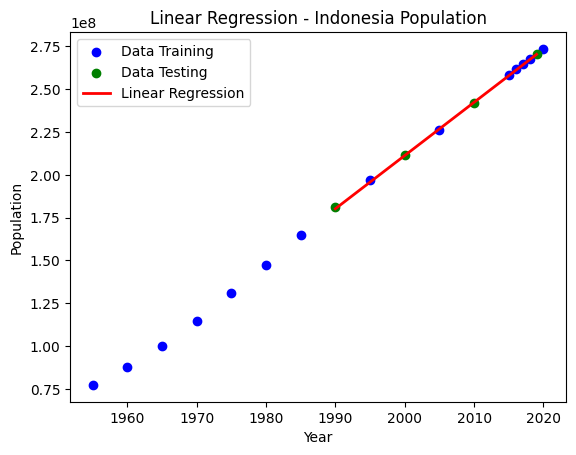

In [ ]:
# Menampilkan hasil linear regression
plt.scatter(X_train, y_train, color='blue', label='Data Training')
plt.scatter(X_test, y_test, color='green', label='Data Testing')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Linear Regression - Indonesia Population')
plt.legend()
plt.show()

In [ ]:
# Prediksi populasi di tahun 2019
population_2019 = regressor.predict([[2019]])
print("Prediksi populasi di tahun 2019:", population_2019[0])

Prediksi populasi di tahun 2019: [2.70327337e+08]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
y_actual = dataset[dataset['Year'] == 2019]['Population'].values[0]
mae = mean_absolute_error([y_actual], population_2019)
mae_percentage = mae / ([y_actual], population_2019) * 100
print("MAE:", mae)
print(f"MAE Percentage:", mae_percentage)

MAE: 298231.2411737442
MAE Percentage: [[0.11020068923189999]
 [0.11032226512844778]]


<ipython-input-12-046ff447a67e>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mae_percentage = mae / ([y_actual], population_2019) * 100


In [ ]:
# Prediksi populasi di tahun 2021
population_2021 = regressor.predict([[2021]])
print("Prediksi populasi di tahun 2021:", population_2021[0])
# Prediksi populasi di tahun 2022
population_2022 = regressor.predict([[2022]])
print("Prediksi populasi di tahun 2022:", population_2022[0])
# Prediksi populasi di tahun 2023
population_2023 = regressor.predict([[2023]])
print("Prediksi populasi di tahun 2023:", population_2023[0])
# Prediksi populasi di tahun 2024
population_2024 = regressor.predict([[2024]])
print("Prediksi populasi di tahun 2024:", population_2024[0])

Prediksi populasi di tahun 2021: [2.76544662e+08]
Prediksi populasi di tahun 2022: [2.79653325e+08]
Prediksi populasi di tahun 2023: [2.82761988e+08]
Prediksi populasi di tahun 2024: [2.85870651e+08]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
